In [1]:
import sys
sys.path.append('/kaggle/input/vqvae1/vq-vae-2-ee6180')

In [2]:
from vqvae import VQVAE
import torch
from loader import dataloader
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

README.md:   0%|          | 0.00/288 [00:00<?, ?B/s]

train-00000-of-00016.parquet:   0%|          | 0.00/476M [00:00<?, ?B/s]

train-00001-of-00016.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00002-of-00016.parquet:   0%|          | 0.00/479M [00:00<?, ?B/s]

train-00003-of-00016.parquet:   0%|          | 0.00/476M [00:00<?, ?B/s]

train-00004-of-00016.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00005-of-00016.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00006-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00007-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00008-of-00016.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00009-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00010-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00011-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00012-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00013-of-00016.parquet:   0%|          | 0.00/476M [00:00<?, ?B/s]

train-00014-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

train-00015-of-00016.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/70000 [00:00<?, ? examples/s]

In [3]:
model = VQVAE()
weights = torch.load("/kaggle/input/vqvae-560/vqvae_560.pt")
model.load_state_dict(weights)

<ipython-input-3-821b1c3d2a0c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load("/kaggle/input/vqvae-560/vqvae_560.pt")


<All keys matched successfully>

In [4]:
residuals = []
model.cuda()
model.eval()
for batch in tqdm(dataloader):
    batch = batch.cuda()
    with torch.no_grad():
        dec, diff = model(batch)
    residual = ((dec - batch)**2).mean()
    residuals.append(residual.item())
residuals = torch.tensor(residuals).mean()
print(residuals)

100%|██████████| 1094/1094 [02:33<00:00,  7.13it/s]

tensor(0.0044)


In [19]:
from tqdm import tqdm
residuals = []
model.cuda()
model.eval()
i = 0
for batch in tqdm(dataloader):
    i =i+1
    batch = batch.cuda()
    with torch.no_grad():
        dec, diff = model(batch)
    if i == 15:
        break

  1%|▏         | 14/1094 [00:03<04:52,  3.70it/s]


In [20]:
batch_imgs = (batch + 1)/2 
batch_imgs = batch_imgs.permute(0,2,3,1).detach().cpu().numpy()
# batch_imgs = batch_imgs.round().astype(np.uint8)

recon_imgs = (dec + 1)/2 
recon_imgs = recon_imgs.permute(0,2,3,1).detach().cpu().numpy()
# recon_imgs = recon_imgs.round().astype(np.uint8)
recon_imgs = recon_imgs.clip(0,1)

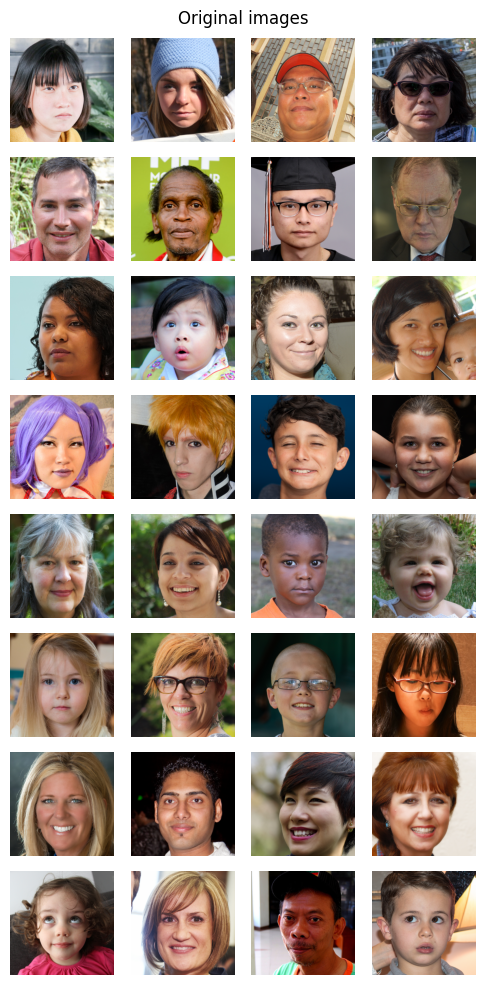

In [25]:
fig, axs = plt.subplots(8,4,figsize=(5,10))
axs = axs.flatten()

for i in range(32):
    axs[i].imshow(batch_imgs[i])
    axs[i].axis('off')
plt.suptitle('Original images')
plt.tight_layout()
plt.savefig("orig.png", bbox_inches = "tight")

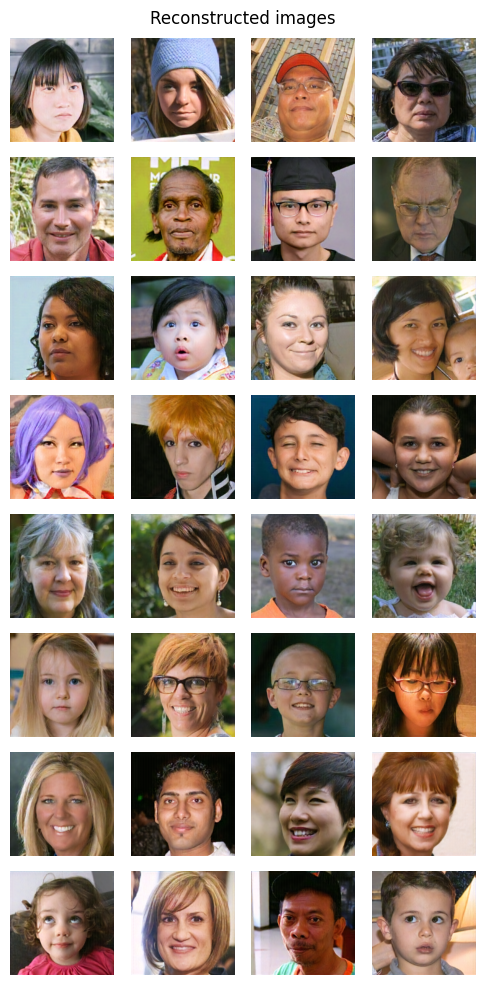

In [26]:
fig, axs = plt.subplots(8,4,figsize=(5,10))
axs = axs.flatten()

for i in range(32):
    axs[i].imshow(recon_imgs[i])
    axs[i].axis('off')
plt.suptitle('Reconstructed images')
plt.tight_layout()
plt.savefig("recon.png", bbox_inches = "tight")

In [28]:
from PIL import Image

# Open images
img1 = Image.open("orig.png")
img2 = Image.open("recon.png")

# Stitch side by side
widths, heights = zip(*(i.size for i in [img1, img2]))
total_width = sum(widths)
max_height = max(heights)

stitched_img = Image.new("RGB", (total_width, max_height))
stitched_img.paste(img1, (0, 0))
stitched_img.paste(img2, (img1.width, 0))

# Show or save the final image
stitched_img.show()
stitched_img.save("stitched.png")

In [29]:
N = 4000
orig_imgs = []
recon_imgs = []


model.eval()
for batch in tqdm(dataloader):
    batch = batch.cuda()
    with torch.no_grad():
        dec, diff = model(batch)
    batch = batch.cpu()
    orig_imgs.extend(batch.numpy())
    recon_imgs.extend(dec.cpu().numpy())
    if len(orig_imgs) >= N:
        break
    
orig_imgs = np.stack(orig_imgs, axis=0)
recon_imgs = np.stack(recon_imgs, axis=0)

  6%|▌         | 62/1094 [00:17<04:45,  3.62it/s]


In [30]:
orig_imgs = np.stack(orig_imgs, axis=0) 
recon_imgs = np.stack(recon_imgs, axis=0)

In [31]:
orig_imgs = (orig_imgs+1)/2
recon_imgs = (recon_imgs+1)/2

In [32]:
orig_imgs = orig_imgs.transpose(0, 2, 3, 1) 
recon_imgs = recon_imgs.transpose(0, 2, 3, 1)
recon_imgs = recon_imgs.clip(0,1)

In [33]:
np.save('orig_imgs.npy', orig_imgs)
np.save('recon_imgs.npy', recon_imgs)

In [34]:
from fid import calculate_fid
import numpy as np

orig_imgs = np.load('orig_imgs.npy')
recon_imgs = np.load('recon_imgs.npy')
score = calculate_fid(orig_imgs,recon_imgs,False,16)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [35]:
score

17.354044182988048